# PROJECT ID : "PRCP-1010-InsClaimPred"

# Problem Statement :
## Task 1 :
### Create a predictive model which will help the insurance marketing team to know which customer will claim the insurance.
## Task 2 :
### Suggestions to the Insurance market team to make customers buy the product.

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load data

df = pd.read_csv("train.csv")

In [3]:
# Basic checks

df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df.shape

(595212, 59)

This dataset has **595212 rows** and **59 columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

The data has dtype **float64 as 10 columns** and dtype **int64 as 49 columns**  and **No Null Values** in the data

In [6]:
# Descriptive Statistics

df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## No feature names so we are skipping the EDA

In [7]:
# dropping the irrelevant column

df.drop('id', axis = 1, inplace = True)

As we know **id** doesn't help in the model prediction so we are dropping

In [8]:
df.head(2)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0


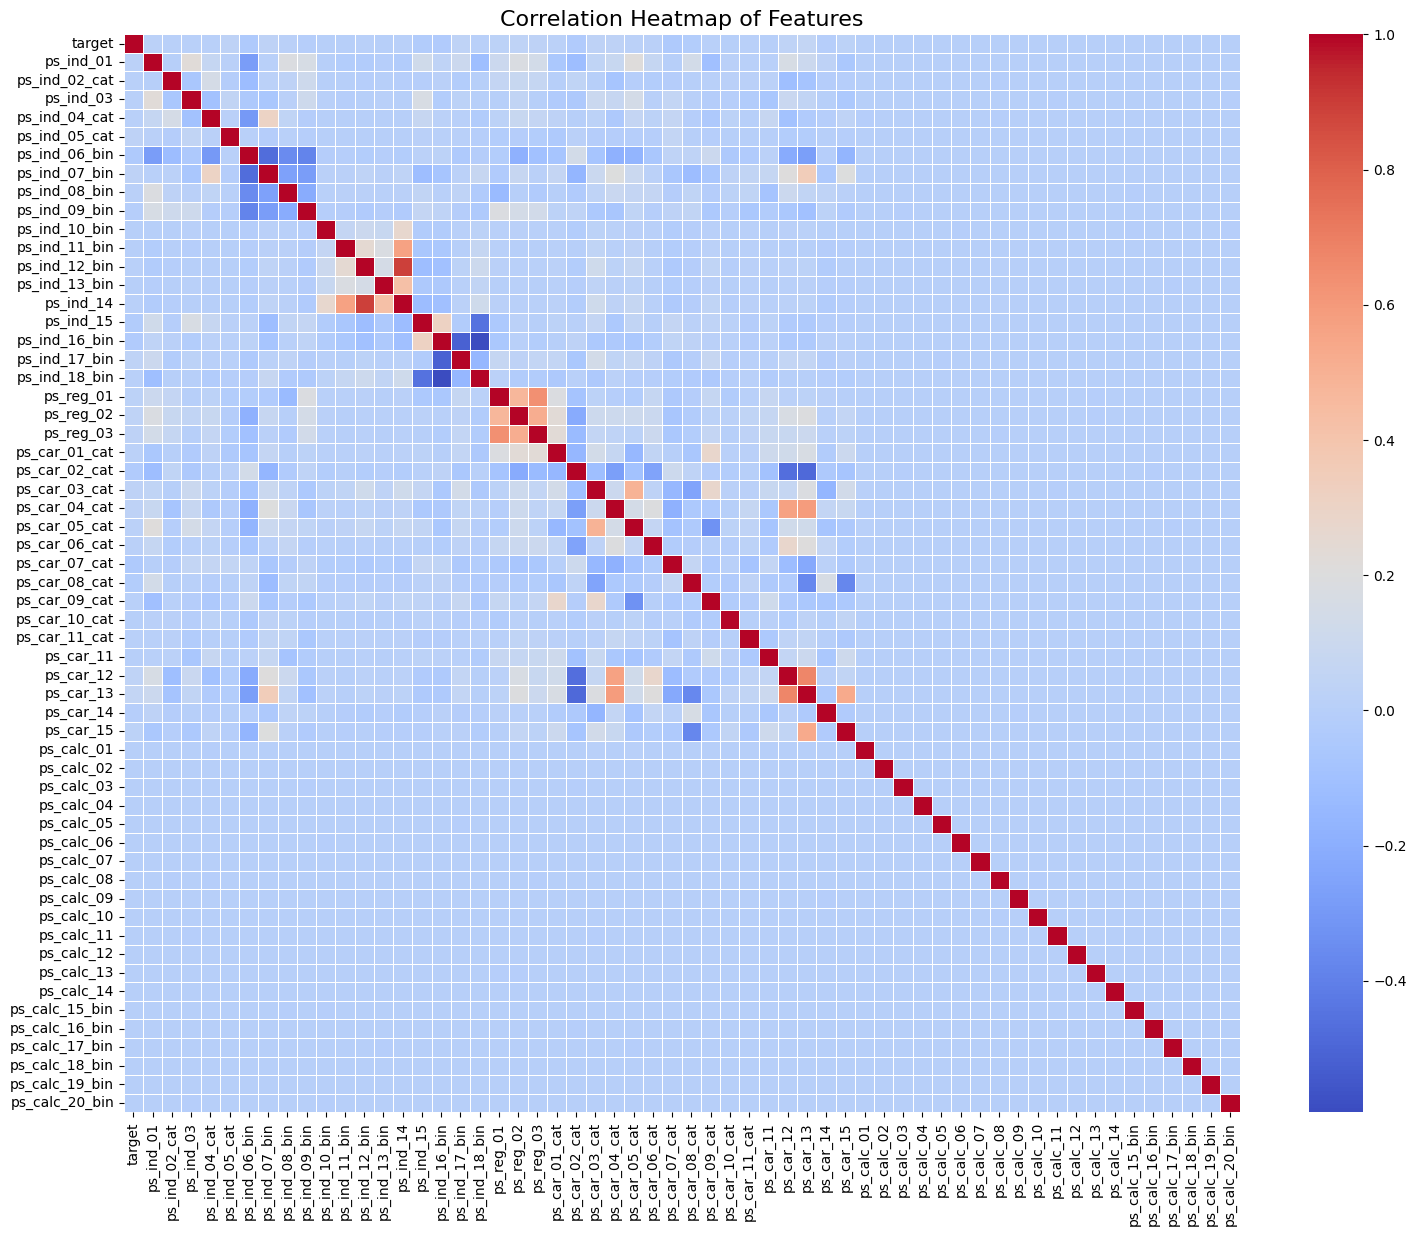

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the figure size for better readability
plt.figure(figsize=(18, 14))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Features', fontsize=16)

# Show the plot
plt.show()


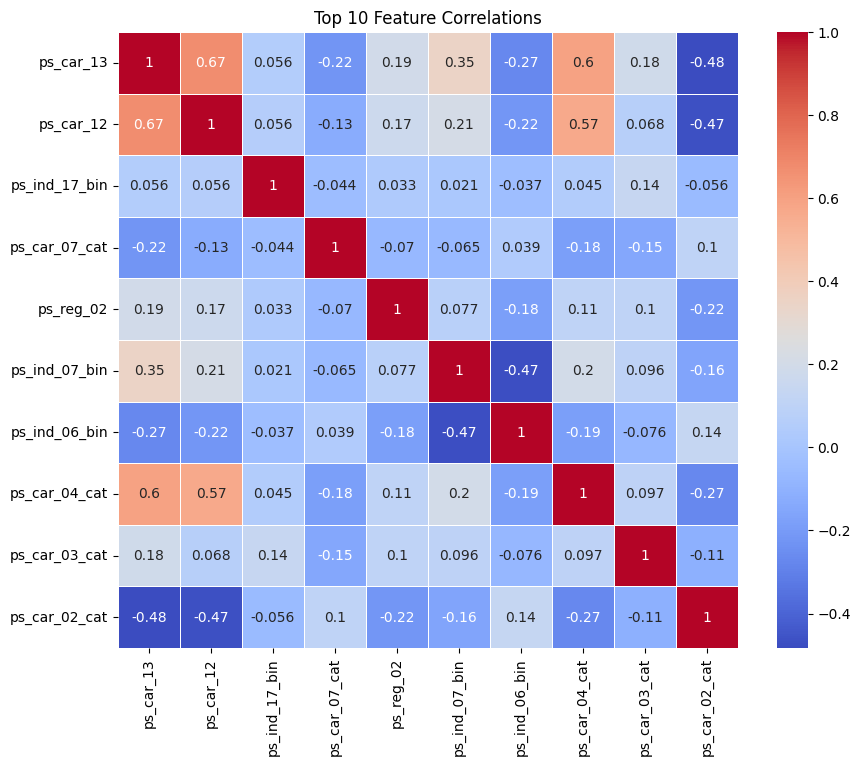

In [10]:
# Assuming your target column is named 'target'
correlation_target = correlation_matrix['target'].abs().sort_values(ascending=False)

# Get top 10 most correlated features
top_features = correlation_target[1:11].index  # Skip the target itself

# Create a heatmap only for these top features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top 10 Feature Correlations')
plt.show()


In [11]:
df.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

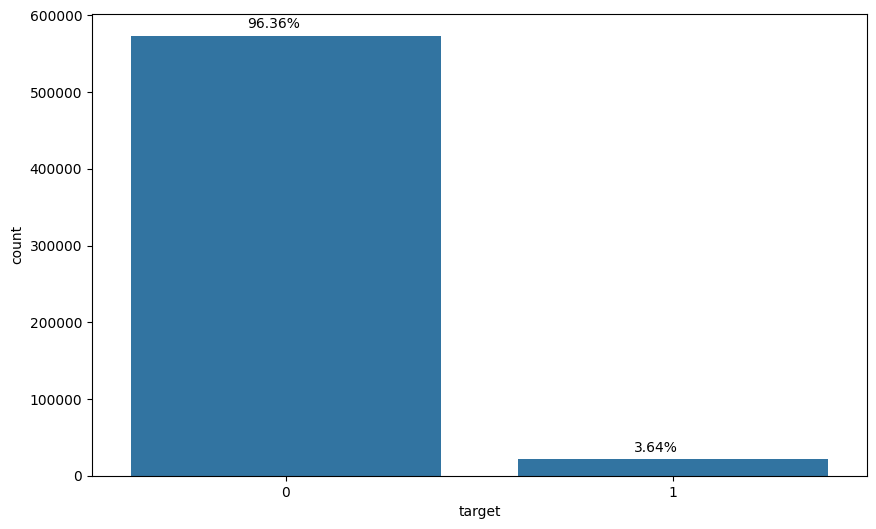

In [12]:
# Analysing the target column

plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['target'])
for p in ax.patches:
    ax.annotate("{:.2f}%".format(100*p.get_height()/len(df['target'])),
                (p.get_x() + 0.3, p.get_height() + 10000))

The Visualize says that **96.36% of the people are not claiming** and only **3.64% of the people are claiming** the insurance 

## Task 1 :
### Create a predictive model which will help the insurance marketing team to know which customer will claim the insurance.

In [13]:
# split the data into X and y

x = df.drop('target', axis = 1)
y = df.target

We split the data into X(independent) and y(dependent) feature for model training

In [14]:
#Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

1) We split the x and y into **traing and testing data**
2) We took the **training size 70% and testing size as 30%**
3) We make the data into the Standardize format

### Model training and evaluation

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'liblinear')
lr_model.fit(x_train_scaled,y_train)

LogisticRegression(solver='liblinear')

We trained the logistic regression model with the x_train and y_trian

In [16]:
#  Making the prediction

lr_preds = lr_model.predict(x_test_scaled)

We made the predictions on the x_test_scaled

In [17]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

accuracy_score(y_test, lr_preds)
classi_repo = classification_report(y_test, lr_preds)
print(classi_repo)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.00      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



ROC AUC Score: 0.5770


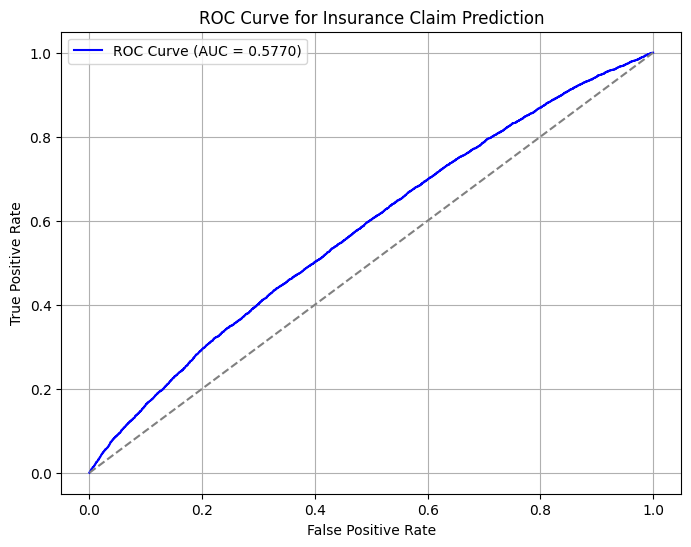

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class (class 1)
y_probs = lr_model.predict_proba(x_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Insurance Claim Prediction')
plt.legend()
plt.grid(True)
plt.show()


1) The Logistic **Regression** leads to overfitting
2) The data is imbalanced in the **target** so we need to make the data balance

## Data Balancing

Basically we are going with the 
1) oversampling
3) SMOTE

#### oversampling
oversampling is to increase the number of samples in the minority class so that machine learning models can learn equally from all classes and avoid bias toward the majority class

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Assume new_df is your original DataFrame
x = df.drop('target', axis=1)
y = df['target']

# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Combine back to one DataFrame (optional)
x_resampled = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled, name='target')
upsampled = pd.concat([x_resampled, y_resampled], axis=1)

# Check new class distribution
print(upsampled.target.value_counts())


target
0    401539
1    401539
Name: count, dtype: int64


By using the RandomOverSampler we increased the minority class and made both 0 and 1 equall

### Logistic on the oversample data

In [20]:
# training the logistic model
lr_model.fit(x_resampled,y_resampled)

# make the predictions
pred_lr = lr_model.predict(x_test)

# evaluate the model
print(classification_report(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76    171979
           1       0.05      0.55      0.10      6585

    accuracy                           0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.74    178564

[[107787  64192]
 [  2947   3638]]


Logistic Regression on the oversampling is not performing well due to huge data so we need to reduce the dimensionality of the data

## PCA - Principal Component Analysis
PCA, or Principal Component Analysis, is a widely used technique in machine learning and data analysis for reducing the dimensionality of high-dimensional datasets.

The basic idea of PCA is to identify the most important patterns and relationships in the data, and represent them in a lower-dimensional space.

In PCA we use explained variance ratio to obtain the optimum value for the data.

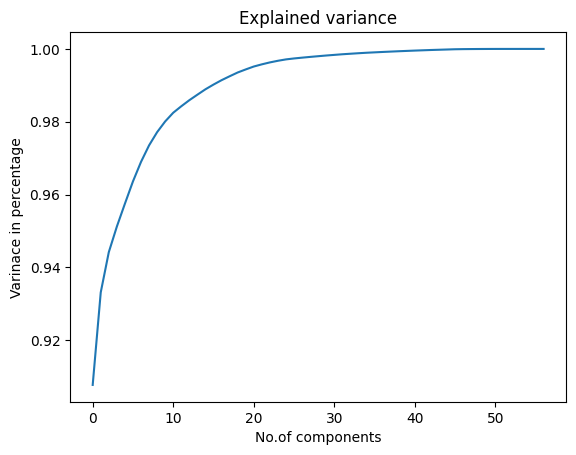

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
principle_components = pca.fit_transform(x)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No.of components")
plt.ylabel("Varinace in percentage")
plt.title("Explained variance")
plt.show()

Through the visual we can say that the **10 PCA components explaining 98% of data**

We are reducing it to 2 components

In [22]:
pca = PCA(n_components = 2)

x1 = pca.fit_transform(x)

# Adding column names
x1 = pd.DataFrame(data=x1,columns=['PCA1','PCA2'])

print('shape of the data after PCA: ',x1.shape)

shape of the data after PCA:  (595212, 2)


In [23]:
x1.head()

,PCA1,PCA2
0,-50.233107,-2.275451
1,-43.196497,4.627205
2,-2.203477,7.413467
3,41.803072,4.052414
4,19.820400,7.213631


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [25]:
 x1 = pd.DataFrame(x1)

In [26]:
# trian test split

from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y2_test = train_test_split(x1,y,test_size = 0.3,random_state = 42)

In [27]:
new_df = pd.concat([x1_train,y1_train], axis = 1)

In [28]:
# oversampling 

from sklearn.utils import resample

class_0 = new_df[new_df.target==0]# Class 0 is persons will not take insurance
class_1 = new_df[new_df.target==1]# Class 0 is persons will take insurance

# upsampled minority class 
class_upsampled = resample(class_1,
                           replace=True, # sample with replacement
                           n_samples=len(class_0), # match number in majority class
                           random_state=27) # reproducible results



# combine majority and upsampled minority 
upsampled = pd.concat([class_0, class_upsampled])

# check new class counts
upsampled.target.value_counts()

target
0    401539
1    401539
Name: count, dtype: int64

## SMOTE-Synthetic Minority Over-sampling Technique

SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique commonly used in machine learning to deal with imbalanced datasets.
It involves generating synthetic samples of the minority class by interpolating between existing minority class samples.

In [29]:
# trian test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.3,random_state = 42)

In [30]:
# shape to the data

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(416648, 2)
(178564, 2)
(416648,)
(178564,)


In [31]:
# Apply Smote on the training data

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [32]:
# importing counter to check the number of items in both classes after SMOTE

from collections import Counter

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 401539, 1: 15109})
Counter({0: 401539, 1: 401539})


### Logistic Regression, DecisionTreeClassifier and XGBoost model for SMOTE

In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver = 'liblinear')
lr_model.fit(x_train_smote,y_train_smote)

# make predcition
pred_lr = lr_model.predict(x_test)

# model evaluate 
print("Accuracy score",accuracy_score(y_test,pred_lr))

print("Confusion Matrix\n",confusion_matrix(y_test,pred_lr))

print("classification_report\n", classification_report(y_test,pred_lr))

Accuracy score 0.5034889451401179
Confusion Matrix
 [[86464 85515]
 [ 3144  3441]]
classification_report
               precision    recall  f1-score   support

           0       0.96      0.50      0.66    171979
           1       0.04      0.52      0.07      6585

    accuracy                           0.50    178564
   macro avg       0.50      0.51      0.37    178564
weighted avg       0.93      0.50      0.64    178564



The model performance is not improved even after applying the smote on the data for logistic Regression

In [34]:
# Decision Tree Classifier


# importing the model library
from sklearn.tree import DecisionTreeClassifier 

# object creation
model_dt = DecisionTreeClassifier()

# fitting the data
model_dt.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [35]:
# make predcition
pred_dt = model_dt.predict(x_test)

# model evaluate 
print("Accuracy score",accuracy_score(y_test,pred_dt))

print("Confusion Matrix\n",confusion_matrix(y_test,pred_dt))

print("classification_report\n", classification_report(y_test,pred_dt))

Accuracy score 0.7407932169978271
Confusion Matrix
 [[130569  41410]
 [  4875   1710]]
classification_report
               precision    recall  f1-score   support

           0       0.96      0.76      0.85    171979
           1       0.04      0.26      0.07      6585

    accuracy                           0.74    178564
   macro avg       0.50      0.51      0.46    178564
weighted avg       0.93      0.74      0.82    178564



The Decision Classifier is performing better compared with the logistic regression

### XGBoost model for SMOTE data
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
A wide range of applications: Can be used to solve regression, classification
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [36]:
# importing the model library
from xgboost import XGBClassifier

# object creation
model_xgb = XGBClassifier(max_depth = 10,
                           learning_rate = 0.001,
                           scale_pos_weight = 1.50,
                           min_child_weight = 16,
                           reg_alpha = 1.0,
                           reg_lambda = 1.0,
                           gamma = 1.0,
                           n_estimators=200,
                           max_delta_step=1,
                           booster='gbtree',
                           subsample=1.0,
                           colsample_bytree =1.0,
                           grow_policy='depthwise',
                           tree_method='approx',
                           objective='binary:logitraw')
                                 
 
# fitting the data
model_xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1.0, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=10,
              max_leaves=None, min_child_weight=16, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# predicting the values

pred_xgb = model_xgb.predict(x_test)

In [38]:
# evaluating accuracy score

accuracy_score(y_test,pred_xgb)

0.9323659864250353

In [39]:
# using confusion matrix to evaluate the classifications for the XGBClassifier

confusion_matrix(y_test,pred_xgb)

array([[166096,   5883],
       [  6194,    391]], dtype=int64)

In [40]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    171979
           1       0.06      0.06      0.06      6585

    accuracy                           0.93    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.93      0.93    178564



1) The xgb model on smote is performing better compared to both the decision classifier and the logistic regression
2) But the Xgb model performance is good to deploy the model
3) So, we need to move with the Sequential model

# Sequential Model
A sequential model is a type of neural network architecture in which the data flows in a sequential order, one layer after the other.
In other words, the output from one layer is fed as input to the next layer and so on, until the final output is produced.

In [41]:
# spliting the data

x = df.drop('target', axis = 1)
y = df['target']

In [42]:
x.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [43]:
# Scale the independent variables using Minmax scalar

from sklearn.preprocessing import MinMaxScaler

scale_mm = MinMaxScaler()

x = scale_mm.fit_transform(x)

In [44]:
# Converting scaled data to Dataframe

x = pd.DataFrame(x)

In [45]:
# To display first 5 rows of the dataset

x.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.285714,0.6,0.454545,1.0,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.473684,0.1,0.384615,0.347826,0.0,1.0,1.0,0.0,0.0,1.0
1,0.142857,0.4,0.636364,0.5,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.157895,0.1,0.076923,0.391304,0.0,1.0,1.0,0.0,1.0,0.0
2,0.714286,1.0,0.818182,1.0,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.210526,0.2,0.538462,0.304348,0.0,1.0,1.0,0.0,1.0,0.0
3,0.000000,0.4,0.181818,0.5,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.105263,0.2,0.307692,0.391304,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.6,0.000000,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.157895,0.1,0.076923,0.130435,0.0,0.0,0.0,1.0,1.0,0.0


In [46]:
# Splitting the data for train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
#checking the shape of train and test data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(476169, 57)
(476169,)
(119043, 57)
(119043,)


In [48]:
# importing model from the library
from imblearn.over_sampling import SMOTE

# object creation
smote = SMOTE()

# fitting and resampling the data 
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [49]:
# importing Counter to check the number of items in both classes after SMOTE

from collections import Counter

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 458860, 1: 17309})
Counter({0: 458860, 1: 458860})


In [50]:
# Getting the class counts in y_train

num_classes = len(np.unique(y_train_smote))
num_classes

2

In [51]:
# importing keras

from tensorflow import keras

In [52]:
# one-hot encode the training labels and the testing labels and converting the array value (class vector) into matrix

y_train_smote = keras.utils.to_categorical(y_train_smote, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
# checking the dimension after One Hot Encoding

print(x_train_smote.shape)
print(y_train_smote.shape)

(917720, 57)
(917720, 2)


In [54]:
# Splitting the data into Train and Validation set

(x_train, x_val) = x_train_smote[150000:], x_train_smote[:150000] 
(y_train, y_val) = y_train_smote[150000:], y_train_smote[:150000]

In [55]:
# Checking the shape of train, test and validation samples

print('Train samples: ',x_train.shape[0])
print('Test samples: ',x_test.shape[0])
print('Validation samples: ',x_val.shape[0])


Train samples:  767720
Test samples:  119043
Validation samples:  150000


In [56]:
# Importing sequential model and required layers

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

# Setting the input shape
input_shape = (58,)

# Creating essential layers for model

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu', input_shape=(57,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [57]:
# Compiling the optimizer,loss and metrics inputs later setting to the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Fitting the model

history = model.fit(x=x_train, y=y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - accuracy: 0.6381 - loss: 0.6276 - val_accuracy: 0.7991 - val_loss: 0.5310
Epoch 2/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.7342 - loss: 0.5323 - val_accuracy: 0.8062 - val_loss: 0.4907
Epoch 3/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 112s 5ms/step - accuracy: 0.7761 - loss: 0.4824 - val_accuracy: 0.8456 - val_loss: 0.4096
Epoch 4/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.7989 - loss: 0.4430 - val_accuracy: 0.8273 - val_loss: 0.4401
Epoch 5/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.8193 - loss: 0.4079 - val_accuracy: 0.8026 - val_loss: 0.4858
Epoch 6/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 0.8322 - loss: 0.3827 - val_accuracy: 0.8545 - val_loss: 0.3833
Epoch 7/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 0.8430 - loss: 0.3645 - val_accuracy: 0.8635 - val_loss: 0.3953
Epoch 8/20
23992/23992 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy:

In [59]:
# Predicting the values of y using x_test

y_pred = model.predict(x_test)

3721/3721 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [60]:
# Evaluating Accuracy Score

score = model.evaluate(x_test,y_test,verbose=0)

accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)


Test accuracy: 86.4662%


3721/3721 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Accuracy Score: 0.8647
Confusion Matrix:
 [[102336  12322]
 [  3789    596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93    114658
           1       0.05      0.14      0.07      4385

    accuracy                           0.86    119043
   macro avg       0.51      0.51      0.50    119043
weighted avg       0.93      0.86      0.90    119043

ROC AUC Score: 0.5404


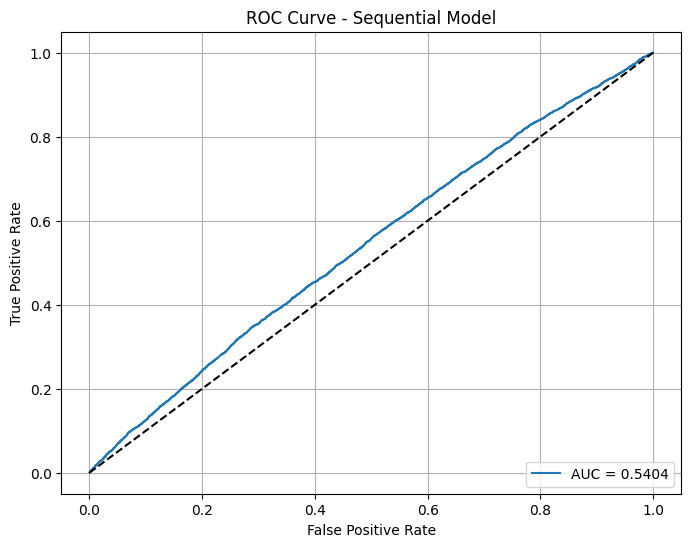

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities (shape: [n_samples, 2])
y_probs = model.predict(x_test)

# Convert one-hot encoded y_test back to label form
y_true = np.argmax(y_test, axis=1)

# Convert predictions to class labels
y_pred = np.argmax(y_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# ROC AUC Score (for binary classification only)
if y_probs.shape[1] == 2:
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_probs[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Sequential Model")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


### conclusion


1) The Dataset was large, totally around 6 lakhs samples & before preprocessing 2% of the datasamples were dropped.
2) The samples were highly imbalanced hence over sampling, undersampling, SMOTE Technique were applied on the data to balance the classes to the dataset.
3) Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
4) The boosting & ensemble algorithms perform the best on the current dataset.

### Challanges

1) The data is non linear and highly imbalanced which resulted in Over-fitting.
2) It was difficult to understand data and pre-process it due to the data and feature names being irrelevant.
3) The run time was high during fitting the model.
4) Accuracy was good for few models but the problem was presence of several outliers whereas for few models accuracy was poor.
5) There are misclassifications and handling them was difficult.

# Model Comparision Report 

1) We used Logistic Regression, Decision Tree, Random Forest, XGBoost along with OverSampling, SMOTE and PCA.
2) The final model we applied is SEQUENTIAL MODEL which is preferred among all the models as it helps in the customers identify who claim the insurance.

## Task 2 :
### Suggestions to the Insurance market team to make customers buy the product.

1.**Educate Customers on Claim Process & Benefits**
Since a very small percentage actually claim insurance, many may not understand the value or trust the process.
Create awareness campaigns explaining

2.**Target Likely Buyers Using Predictive Insights**
Use the trained model to score customers by claim likelihood.

Segment marketing campaigns:

High-probability customers → promote upgrades or add-on products.
Low-probability customers → educational and trust-building content.

3.**Personalize Insurance Plans**
Use customer demographics (age, income, profession) to offer customized insurance bundles.
Offer discounts or premium waivers to low-risk profiles to encourage more sign-ups.

4.**Incentivize First-Time Buyers**
Introduce limited-time offers for new customers.
Provide “no-claim bonus” programs that reward customers even if they don’t make a claim.

5.**Partner with Hospitals & Health Services**
Offer insurance at the point of care—this can increase credibility and purchase intent.
Bundle insurance with routine health checkups or telehealth services.

6.**Address Psychological Barriers**
Many customers avoid buying insurance because they believe “nothing will happen to me.”
Run marketing with storytelling focused on young people facing unexpected events and how insurance helped.

7.**Follow Up with Non-Claimers**
Analyze why the 96.36% of people never claimed.

Did they never need it?
Or did they not know how to claim?